# REPORTE 7

Camila Durand con Katherine Milla 20200526

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns, warnings
import statsmodels.formula.api as smf
warnings.filterwarnings('ignore')
from causalgraphicalmodels import CausalGraphicalModel
from cProfile import label
%matplotlib inline

### LECTURA

El texto analizado gira en torno al experimento Moving to Opportunity (MTO) y los efectos que genera al dar cupones de vivienda con menores índices de pobreza a familias que vivían en lugares de gran índice de pobreza. Este análisis busca evidenciar los efectos concretos que esta mudanza puede tener en el corto plazo en la vida de los niños y también su efecto en el largo plazo cuando estos ya son adultos. Asimismo toma en cuenta como los efectos varían según la edad de los niños en la etapa de la mudanza.  A mediados de la década de los 90s el departamento de vivienda y desarrollo urbano decidió aplicar por un periodo de tiempo el MTO a familias que vivían en lugares con altos índices de pobreza.  Teniendo una muestra experimental de 4604 familias asignadas aleatoriamente a tres grupos para poder analizar efectivamente el efecto de los cupones. Un grupo de bono experimental al que se le ofreció un bono de vivienda protegida que venía con un requisito para mudarse a una sección censal con una tasa de pobreza inferior al 10%, un grupo de vales de la Sección 8 al que se le ofreció un bono de vivienda protegida estándar sin contingencias adicionales, y un grupo de control al que no se le ofreció un vale (pero retuvo el acceso a la vivienda pública).

El artículo presenta múltiples fortalezas pues ha elaborado un experimento bien seccionado en grupos que le permite aislar el efecto del bono y analizarlo plenamente. Asimismo, la separación que hace en las edades de los niños al obtener el bono ayuda a profundizar sobre el efecto del mismo y con ello permite entender en qué etapa se le puede sacar mayor potencialidad. Descubriendo que mudarse a un vecindario de menor pobreza mejora significativamente las tasas de asistencia a la universidad y los ingresos de los niños que eran pequeños (menores de 13 años) cuando sus familias se mudaron. Caso contrario a cuando los niños son mayores de 13 años, pues la mudanza tiene un efecto disruptivo en su entorno y desarrollo, con ello se demuestra que los beneficios de mudarse se van reduciendo conforme a la edad. Todos estos descubrimientos son apoyados en investigaciones previas de múltiples autores lo que a su vez hace que el artículo obtenga más profundidad y una base teórica sólida. Asimismo usa fuentes referentes a los efectos a largo plazo de la mudanza y lo relaciona a diversas variables como la probabilidad que sean padres solteros, el alcance de su educación y como cuestiones como raza, etnia y género influyen en los resultados. Sin embargo, la investigación también tiene debilidades como que no se puede establecer de manera concluyente que la exposición infantil a un mejor ambiente tiene un efecto causal en los resultados a largo plazo porque las edades en que los niños mudanza están perfectamente correlacionados con su tiempo de exposición a un barrio de menor pobreza. Como resultado, no podemos distinguir las diferencias en los efectos de interrupción por edad en el momento de un cambio de un costo de disrupción invariable con la edad junto con un efecto de exposición. Además, los efectos del tratamiento para familias con niños pequeños versus mayores podrían diferir porque el conjunto de familias que tomó el bono y las áreas a las que se mudaron pueden variar entre los dos grupos.

El principal aporte de este artículo sobre la interrogante inicialmente planteada mediante el analista de heterogeneidad es que los beneficios a largo plazo de la exposición de la niñez a vecindarios de menor pobreza es muy sólida en todos los géneros, grupos raciales, y ubicaciones geográficas. Particularmente su aporte se debe al mecanismo utilizado de modelo de exposición lineal, una forma diferente de evaluar los efectos del MTO conforme a la edad  y como todo ello se puede conciliar con los hallazgos de investigaciones previas sobre los impactos de MTO sobre la economía y el desarrollo en general. 

Finalmente es importante reconocer hacia donde puede seguir esta investigación tomando en cuenta que MTO no tuvo impacto en los resultados de los adultos (independientemente del tiempo de exposición a áreas de menor pobreza en la edad adulta) implica que los efectos del vecindario operan principalmente a través de efectos de "desarrollo" durante la niñez (Sampson 2002) en lugar de los efectos contextuales que surgen del desajuste espacial o otras fuerzas. Por ello y para contextualizar investigaciones similares en nuestra región sería bueno tener orientar las investigaciones hacia las relaciones estructurales entre los pueblos indígenas, la pobreza y el desarrollo humano tal y como hacen Hall y Patrinos 2005. 


Bibliografía
Hall, G., & Patrinos, H. A. (2005). Pueblos indígenas, pobreza y desarrollo humano en América Latina: 1994-2004. Washington DC: Banco Mundial.

Sampson, Robert J., Jeffrey D. Morenoff y Thomas Gannon-Rowley.2002. “Evaluación "Efectos de vecindario": procesos sociales y nuevas direcciones en la investigación". Revisión Anual de Sociología,28(1): 443–478.


### CODIGO PYTHON

In [2]:
data = pd.read_csv('https://github.com/matheusfacure/python-causality-handbook/raw/master/causal-inference-for-the-brave-and-true/data/online_classroom.csv')
print(data.shape)
data.head()

(323, 10)


,gender,asian,black,hawaiian,hispanic,unknown,white,format_ol,format_blended,falsexam
0,0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,63.29997
1,1,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,79.96000
2,1,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,83.37000
3,1,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,90.01994
4,1,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0,83.30000


In [3]:
data_2 = (data
 .assign(class_format = np.select(
     [data["format_ol"].astype(bool), data["format_blended"].astype(bool)],
     ["online", "blended"],
     default="face_to_face" #create a new variable
 ))) #group by the new variable (treatments)

In [4]:
data_2

,gender,asian,black,hawaiian,hispanic,unknown,white,format_ol,format_blended,falsexam,class_format
0,0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,63.29997,face_to_face
1,1,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,79.96000,face_to_face
2,1,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,83.37000,blended
3,1,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,90.01994,blended
4,1,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0,83.30000,online
...,...,...,...,...,...,...,...,...,...,...,...
318,0,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,68.36000,blended
319,1,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,70.05000,online
320,0,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,66.69000,online
321,1,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,83.29997,online


Deben plotear la distribución de las notas para los tres grupos de manera separada. Revisen este link para ayudarse. Les recomiendo que utilicen la libreria seaborn porque es muy práctica para plotear gráficos por grupos. Hint de cómo crear una variable dummy.

- face-to-face
- online lessons
- blended format
1. Sus gráficos deben tener correctamente las legendas y los labels
2. Expliquen qué diferencias encuentran entre los tres histogramas

In [5]:
# create dataset

data_3 = pd.get_dummies(data_2, columns = ["class_format"])
data_3

,gender,asian,black,hawaiian,hispanic,unknown,white,format_ol,format_blended,falsexam,class_format_blended,class_format_face_to_face,class_format_online
0,0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,63.29997,0,1,0
1,1,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,79.96000,0,1,0
2,1,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,83.37000,1,0,0
3,1,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,90.01994,1,0,0
4,1,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0,83.30000,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
318,0,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,68.36000,1,0,0
319,1,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,70.05000,0,0,1
320,0,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,66.69000,0,0,1
321,1,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,83.29997,0,0,1


Text(0.5, 1.0, 'BLENDED')

<Figure size 1008x720 with 0 Axes>

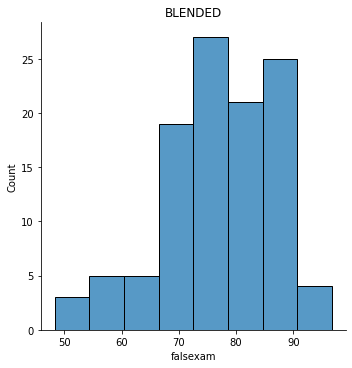

In [6]:
plt.figure(figsize=(14,10))

blended = data_3.loc[data_3['class_format_blended'] == 1]
sns.displot(blended, x = "falsexam")

plt.title('BLENDED')

Text(0.5, 1.0, 'FACE TO FACE')

<Figure size 1008x720 with 0 Axes>

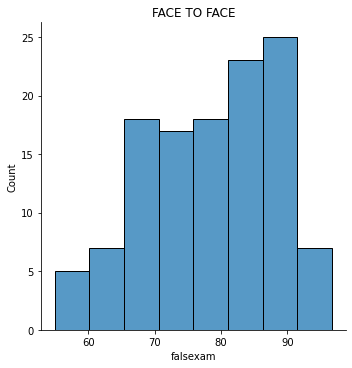

In [7]:
plt.figure(figsize=(14,10))

face_to_face = data_3.loc[data_3['class_format_face_to_face'] == 1]
sns.displot(face_to_face, x = "falsexam")

plt.title('FACE TO FACE')

Text(0.5, 1.0, 'ONLINE')

<Figure size 1008x720 with 0 Axes>

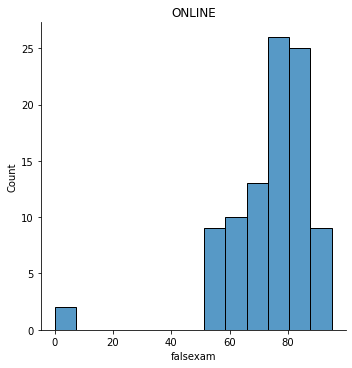

In [8]:
plt.figure(figsize=(14,10))

online = data_3.loc[data_3['class_format_online'] == 1]
sns.displot(online, x = "falsexam")

plt.title('ONLINE')

<AxesSubplot:xlabel='falsexam', ylabel='Count'>

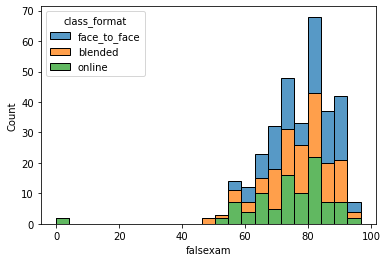

In [16]:
sns.histplot(data=data_2, x="falsexam" , hue="class_format", multiple ="stack", common_norm=False)

LOs histogramas analizados muestran en general una asimetria negativa, pues tienen una cola hacia el lado izquierdo y una mayor concentracion de datos al lado derecho. En el caso del formato blended se ve una gfran acumulacion de datos entre el 65 y 90. En el caso de clases en formato face to face hay una concentracion mayor en valores previos al 65 y son sostenidos en mayor medidad. Finalmente en el caso del formato online ha una concetracion mayor a partir del 70-75 y tambien se tiene un gran vacio entre los valores del 10 al 50, lo cula tambien nos permite ver que hay un pequeño grupo que categoriza esta metodologia de clases como muy poco funcional al tener los puntos mas bajos de los 3 anlizados, pues ese pequeño grupo lo categoriza del 0 al 10. Por lo general el formato de clases face to face parece tener mejores resultados que los otros dos formatos debido a la mayor concentracion de personas con mayores puntajes 

#### DIFFERENCE IN MEANS ESTIMATOR

Ahora solo se van a concentrar en los grupos face-to-face y online lessons. Para ello pueden seguir estos pasos:

1. Crear un nuevo dataset donde solo incluyan estos dos grupos
2. Calculan el promedio del grupo online lessons
3. Calculan el primdeio del grupo face-to-face
4. Toman la diferencia entre el valor encontrado en 2 y el valor en 3.

¿Cuál es su interpretación del resultado encontrado?

In [9]:
data_4 = data_3.loc[(data_3['class_format_face_to_face'] == 1) | (data_3['class_format_online'] == 1)]
data_4

,gender,asian,black,hawaiian,hispanic,unknown,white,format_ol,format_blended,falsexam,class_format_blended,class_format_face_to_face,class_format_online
0,0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,63.29997,0,1,0
1,1,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,79.96000,0,1,0
4,1,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0,83.30000,0,0,1
5,0,1.0,0.0,0.0,0.0,0.0,0.0,1,0.0,88.34996,0,0,1
7,1,1.0,0.0,0.0,0.0,0.0,0.0,0,0.0,90.00000,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
316,0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,91.65000,0,1,0
317,1,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,84.99000,0,1,0
319,1,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,70.05000,0,0,1
320,0,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,66.69000,0,0,1


In [10]:
data_5= data_4.groupby(["class_format_face_to_face", 'class_format_online']).mean()
data_5

,,gender,asian,black,hawaiian,hispanic,unknown,white,format_ol,format_blended,falsexam,class_format_blended
class_format_face_to_face,class_format_online,,,,,,,,,,,
0,1,0.542553,0.228571,0.028571,0.014286,0.028571,0.0,0.700000,1.0,0.0,73.635263,0.0
1,0,0.633333,0.202020,0.070707,0.000000,0.010101,0.0,0.717172,0.0,0.0,78.547485,0.0


In [11]:
data_5 = (data_4
          .groupby(['class_format_online', 'class_format_face_to_face'])
          .agg({'falsexam':'mean'}))
data_5

,,falsexam
class_format_online,class_format_face_to_face,
0,1,78.547485
1,0,73.635263


In [12]:
# Y(1)- Y(0) = ATE Average Treatment Effect - Causal 
# Y(1) -> online, Y(0) -> face_to_face
73.635263 - 78.547485

-4.912222

Podemos ver que las clases en modalidad face to face tienen un promedio de puntaje de 78.55 aproxiamdamente, mientras que las clases en modalidad online tienen un promedio de 73.63. Ello tiene una diferencia de alrededor de 5 puntos, lo que no da una tan buena perspectiva de la modalidad online. El ATT para una clase en línea entonces es -4.91 lo que como anterioremnte se menciono significa que los estudiantes mediante la modlaidad online rinden aproxidamente 5 puntos menos.


#### DIFFERENCE IN MEANS ESTIMATOR VIA LINEAR REGRESSION

Ahora van a utilizar una regresión lineal para encontrar lo mismo que en el apartado de arriba. Pueden seguir estos pasos

- Deben crear una variable dummy que tome el valor de 1 cuando el tipo de clase sea online y 0 cuando sea face to face.
- Luego deben realizar una regresion lineal donde Y = Las notas, T = Dummy creada para el tipo de clase.
- Esta regresion es de la siguente manera Y = beta_0 + beta_1*T + e. El valor que encuentren para beta_1 es el average treatment effect que debería ser igual al Difference-in-means estimator encontrado arriba.

¿Cuál es su interpretación del resultado encontrado?

In [13]:
import statsmodels.api as sm 
import statsmodels.formula.api as smf 
from itertools import combinations 

In [14]:
data_4

,gender,asian,black,hawaiian,hispanic,unknown,white,format_ol,format_blended,falsexam,class_format_blended,class_format_face_to_face,class_format_online
0,0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,63.29997,0,1,0
1,1,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,79.96000,0,1,0
4,1,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0,83.30000,0,0,1
5,0,1.0,0.0,0.0,0.0,0.0,0.0,1,0.0,88.34996,0,0,1
7,1,1.0,0.0,0.0,0.0,0.0,0.0,0,0.0,90.00000,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
316,0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,91.65000,0,1,0
317,1,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,84.99000,0,1,0
319,1,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,70.05000,0,0,1
320,0,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,66.69000,0,0,1


In [15]:
#OLS
ols_reg = sm.OLS.from_formula("falsexam ~ class_format_online",
                              data = data_4).fit()

ols_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               falsexam   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     8.554
Date:                Tue, 08 Nov 2022   Prob (F-statistic):            0.00382
Time:                        16:02:38   Log-Likelihood:                -837.85
No. Observations:                 214   AIC:                             1680.
Df Residuals:                     212   BIC:                             1686.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              78.5475      1.113     70.563      0.000      76.353      80.742
class_format_online    -4.9122      1.680     -2.925      0.004      -8.223      -1.601
==============================================================================
Omnibus:                      129.000   Durbin-Watson:                   2.091
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1179.385
Skew:                          -2.179   Prob(JB):                    7.94e-257
Kurtosis:                      13.643   Cond. No.                         2.50
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Con la regresión lineal, se confirma lo hallado previamnete en difference in means, pues nos encontramos nuevamente con un coeficiente de -4.91. Asimismo vemos que los valores son significativos pues on menores a 0.05. Asmismo, el Rsquared demuestra que el modelo  puede explicar el 39% de la variable dependiente, lo cual es significativo. Tambien se toma en cuenta que la variable independiente es dicotómica y por esto, para la regresión se ha usado  "Face-to-Face" como categoría de referencia. Por ello, con la variable ondependiente de formato online se observa que se tiene un realcion inversa, es decir, negativa con la variable dependiente, por lo que se asevera que tener clases virtuales tiene un efecto negatovo en las notas, en contraste de las clases face to face.
